In [1]:
import matplotlib.pyplot as plt
import time
from mlrose_hiive import simulated_annealing, random_hill_climb, mimic, genetic_alg
from mlrose_hiive import OneMax
from mlrose_hiive import FlipFlop
from mlrose_hiive import DiscreteOpt
from mlrose_hiive.algorithms import GeomDecay
import mlrose_hiive

In [4]:
# fitness = OneMax()
# problem = DiscreteOpt(length=100, fitness_fn=fitness)
problem = mlrose_hiive.MaxKColorGenerator()
# problem.set_mimic_fast_mode(True)

In [3]:
# fitness = FlipFlop()
# problem = DiscreteOpt(length=100, fitness_fn=fitness)
# problem.set_mimic_fast_mode(True)

In [38]:
# best_state, best_fitness, curve = random_hill_climb(problem, max_iters=10000, restarts=50, curve=True)
# print(best_fitness)
# print(curve.shape)

604.0
(224, 2)


In [6]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50)
restarts = [1, 10, 50, 100, 150]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_maxk_100',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 5000, 10000], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
max_rhc_stats_100, max_rhc_curve_100 = rh_runner.run()

In [42]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50, max_colors=5)
restarts = [1, 10, 50, 100, 150]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_maxk_100',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 5000, 10000], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
max_rhc_stats_100, max_rhc_curve_100 = rh_runner.run()

In [7]:
max_rhc_stats_100[max_rhc_stats_100.Fitness == max_rhc_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
1800,0.0,18.0,4487,17.849402,"[4, 11, 8, 9, 3, 8, 11, 1, 3, 8, 3, 4, 10, 7, ...",150,10000,135


<AxesSubplot:xlabel='Restarts Problem size 50 nodes, 5 colors', ylabel='Fitness'>

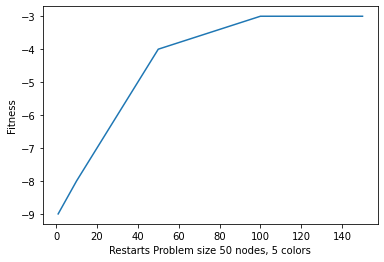

In [54]:
max_rhc_stats_100['m_Fitness'] = max_rhc_stats_100['Fitness'] * -1
max_rhc_stats_100.groupby(['Restarts']).max()['m_Fitness'].plot(xlabel='Restarts Problem size 50 nodes, 5 colors', ylabel='Fitness')

In [44]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=200, max_colors=10)
restarts = [1, 10, 50, 100, 150]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_maxk_500_10',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 5000], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
k_rhc_stats_500, k_rhc_curve_500 = rh_runner.run()

In [26]:
k_rhc_stats_500[k_rhc_stats_500.Fitness == k_rhc_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
170,0.0,32.0,877,0.681110,"[5, 10, 10, 9, 2, 1, 5, 10, 4, 9, 4, 9, 4, 9, ...",50,5000,21
425,0.0,32.0,877,1.169643,"[5, 10, 10, 9, 2, 1, 5, 10, 4, 9, 4, 9, 4, 9, ...",100,5000,21
930,0.0,32.0,877,2.240067,"[5, 10, 10, 9, 2, 1, 5, 10, 4, 9, 4, 9, 4, 9, ...",150,5000,21
1355,0.0,32.0,4405,15.994423,"[0, 7, 4, 6, 6, 6, 5, 10, 7, 8, 11, 1, 6, 1, 5...",150,5000,106


<AxesSubplot:xlabel='Restarts Problem size 20', ylabel='Fitness'>

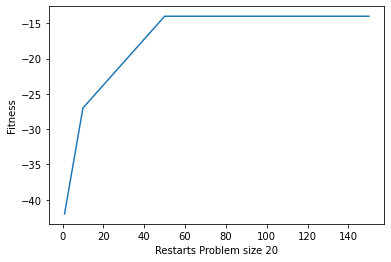

In [45]:
# k_rhc_stats_500.groupby(['Restarts']).max()['Fitness'].plot(xlabel='Restarts Problem size 100', ylabel='Fitness')
k_rhc_stats_500['m_Fitness'] = k_rhc_stats_500['Fitness'] * -1
k_rhc_stats_500.groupby(['Restarts']).max()['m_Fitness'].plot(xlabel='Restarts 200 nodes, 10 colors', ylabel='Fitness')

<AxesSubplot:xlabel='current_restart', ylabel='Fitness problem size 100'>

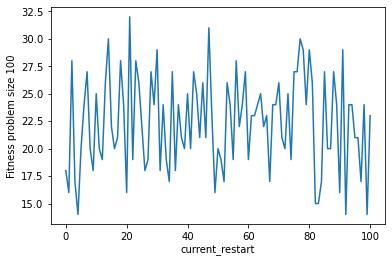

In [28]:
k_rhc_stats_500[k_rhc_stats_500.Restarts == 100].set_index('Iteration').groupby('current_restart').max()['Fitness'].plot(ylabel='Fitness problem size 100', x='Iteration', y='Fitness')

In [40]:
decay = ExpDecay(init_temp=10000, exp_const=0.5)
sa_best_state, sa_best_fitness, sa_curve = simulated_annealing(problem, schedule=decay, curve=True)
print(sa_best_fitness, sa_curve.shape)

752.0 (1136, 2)


In [12]:
PROBLEM_SIZE = 100

In [46]:
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50, max_colors=5)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_maxk_100_5',
                           iteration_list=[10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay],
                           )
sa_stats, sa_curve = sa_runner.run()

In [48]:
sa_stats[sa_stats.Fitness == sa_stats.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
0,0,28.0,0,0.000186,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",geometric,1,0.99,0.001,0.999998,1,10000,NaN
2,0,28.0,0,0.000244,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",exponential,1,NaN,0.001,0.999999,1,10000,0.005
4,0,28.0,0,0.000234,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",geometric,10,0.99,0.001,9.999977,10,10000,NaN
6,0,28.0,0,0.000205,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",exponential,10,NaN,0.001,9.999990,10,10000,0.005
8,0,28.0,0,0.000206,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",geometric,25,0.99,0.001,24.999948,25,10000,NaN
10,0,28.0,0,0.000225,"[3, 4, 2, 4, 4, 1, 2, 2, 2, 4, 3, 2, 4, 1, 3, ...",exponential,25,NaN,0.001,24.999972,25,10000,0.005


Text(0.5, 1.0, 'Fitness vs Initial Temp Problem size 5')

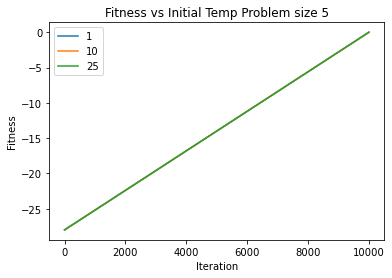

In [56]:
fig, ax = plt.subplots(1, 1)
sa_stats['m_fitness'] = sa_stats['Fitness'] * -1
for temp in init_temp:
    best_curve = sa_stats[sa_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_stats.max_iters == 10000]
    best_curve = best_curve[sa_stats.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp 50 nodes")

In [55]:
print(sa_stats[sa_stats.schedule_type=='exponential'].min()['Fitness'])
print(sa_stats[sa_stats.schedule_type=='geometric'].min()['Fitness'])

print(sa_5_stats[sa_stats.schedule_type=='exponential'].min()['Fitness'])
print(sa_5_stats[sa_stats.schedule_type=='geometric'].min()['Fitness'])

0.0
0.0
0.0
0.0


Text(0.5, 1.0, 'Fitness vs Initial Temp 200 nodes')

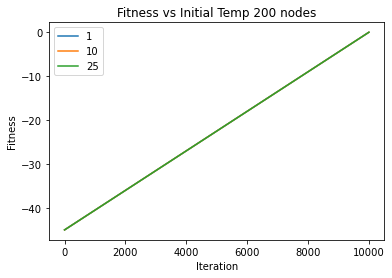

In [60]:
fig, ax = plt.subplots(1, 1)
sa_5_stats['m_fitness'] = sa_5_stats['Fitness'] * -1
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_5_stats.max_iters == 10000]
    best_curve = best_curve[sa_5_stats.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp 200 nodes")

Text(0.5, 1.0, 'Time vs Initial Temp 200 nodes')

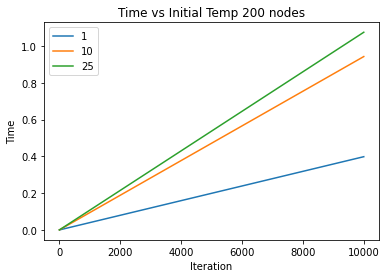

In [62]:
fig, ax = plt.subplots(1, 1)
sa_5_stats['m_fitness'] = sa_5_stats['Fitness'] * -1
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_5_stats.max_iters == 10000]
    best_curve = best_curve[sa_5_stats.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Time', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Time")
ax.legend(init_temp)
ax.set_title("Time vs Initial Temp 200 nodes")

In [49]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=200, max_colors=10)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_maxk_500_10',
                           iteration_list=[10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
sa_5_stats, sa_5_curve = sa_runner.run()

In [19]:
sa_5_stats[sa_5_stats.Fitness == sa_5_stats.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
26,250.0,26.0,490,0.102343,"[8, 1, 6, 7, 11, 6, 8, 0, 4, 7, 8, 9, 4, 10, 7...",exponential,25,NaN,0.001,24.98721,25,10000,0.005


In [17]:
ga_best_state, ga_best_fitness, ga_curve = genetic_alg(problem, curve=True)

In [42]:
print(ga_best_fitness, ga_curve.shape)

572.0 (11, 2)


In [14]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_maxk_100',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_100, ga_curve_100 = ga_runner.run()

In [50]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50, max_colors=5)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_maxk_100_10',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_100, ga_curve_100 = ga_runner.run()

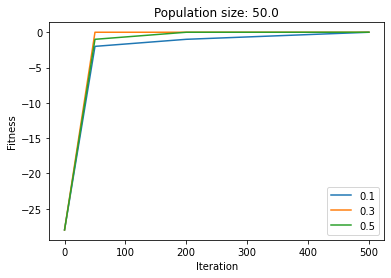

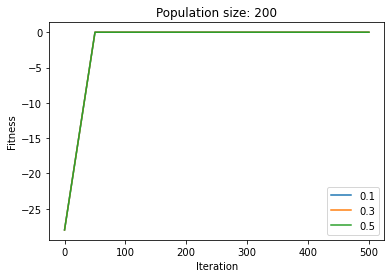

In [64]:
PROBLEM_SIZE = 100
ga_stats_100['m_fitness'] = ga_stats_100['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_100[ga_stats_100['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

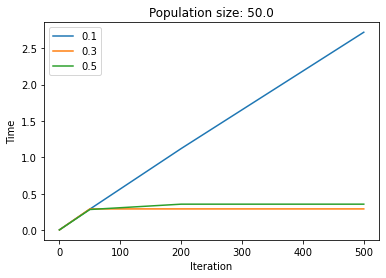

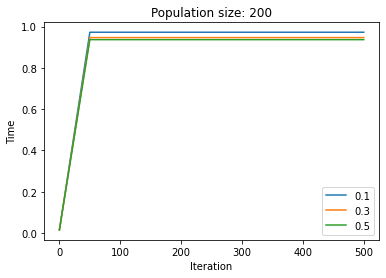

In [65]:
PROBLEM_SIZE = 100
ga_stats_100['m_fitness'] = ga_stats_100['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_100[ga_stats_100['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [41]:
ga_stats_100[ga_stats_100.Fitness != 0].min() #[ga_stats_100.Fitness == ga_stats_100.Fitness.min()]

Iteration                                                        0.0
Fitness                                                          7.0
FEvals                                                            50
Time                                                        0.003975
State              [6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...
Population Size                                                 50.0
Mutation Rate                                                    0.1
max_iters                                                        500
dtype: object

In [51]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=200, max_colors=10)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_maxk_500',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_500, ga_curve_500 = ga_runner.run()

In [17]:
ga_stats_500[ga_stats_500.Fitness == ga_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0.0,18.0,250,0.035361,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",250.0,0.1,2500
4,0.0,18.0,250,0.034889,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",250.0,0.3,2500
8,0.0,18.0,250,0.035368,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",250.0,0.5,2500
12,0.0,18.0,1000,0.139609,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",1000.0,0.1,2500
16,0.0,18.0,1000,0.145534,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",1000.0,0.3,2500
20,0.0,18.0,1000,0.147349,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",1000.0,0.5,2500


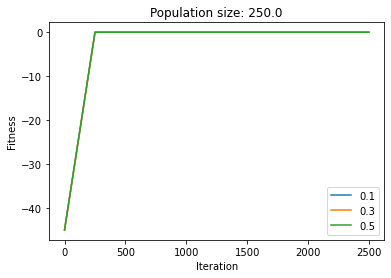

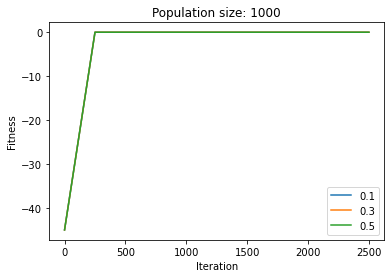

In [67]:
PROBLEM_SIZE = 500
ga_stats_500['m_fitness'] = ga_stats_500['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

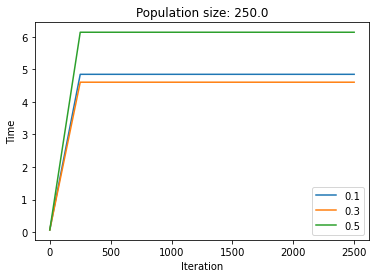

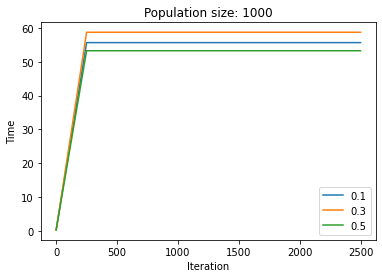

In [68]:
PROBLEM_SIZE = 500
ga_stats_500['m_fitness'] = ga_stats_500['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [44]:
m_best_state, m_best_fitness, m_curve = mimic(problem, curve=True)
print(m_best_fitness, m_curve.shape)

750.0 (36, 2)


In [49]:
problem = DiscreteOpt(length=100, fitness_fn=fitness)
mimic(problem, max_iters=10)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 99.0,
 None)

In [52]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=50, max_colors=5)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='mimc_maxk_100',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_100, m_curve_100 = m_runner.run()

In [21]:
m_stats_100[m_stats_100.Fitness == m_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0.0,7.0,50,0.003978,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,50.0,0.25,500
4,0.0,7.0,50,0.004044,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,50.0,0.50,500
8,0.0,7.0,50,0.003934,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,50.0,0.75,500
12,0.0,7.0,200,0.015319,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,200.0,0.25,500
16,0.0,7.0,200,0.015241,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,200.0,0.50,500
20,0.0,7.0,200,0.015064,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,200.0,0.75,500


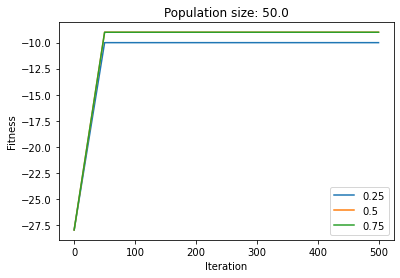

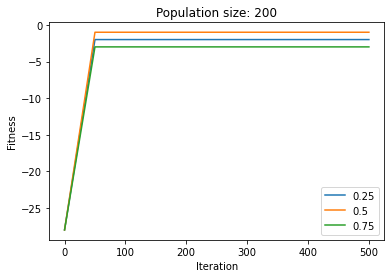

In [69]:
PROBLEM_SIZE = 100
m_stats_100['m_fitness'] = m_stats_100['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

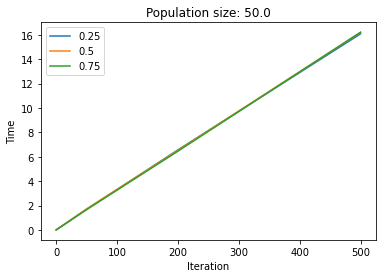

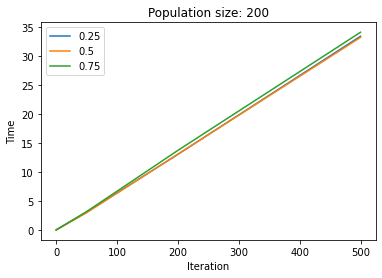

In [70]:
PROBLEM_SIZE = 100
m_stats_100['m_fitness'] = m_stats_100['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

In [53]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.MaxKColorGenerator().generate(42, number_of_nodes=200, max_colors=10)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='mimc_maxk_500',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_500, m_curve_500 = m_runner.run()

In [23]:
m_stats_500[m_stats_500.Fitness == m_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0.0,18.0,250,0.035142,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,250.0,0.25,2500
4,0.0,18.0,250,0.034615,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,250.0,0.50,2500
8,0.0,18.0,250,0.034260,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,250.0,0.75,2500
12,0.0,18.0,1000,0.139026,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,1000.0,0.25,2500
16,0.0,18.0,1000,0.136740,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,1000.0,0.50,2500
20,0.0,18.0,1000,0.140477,"[6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, ...",True,1000.0,0.75,2500


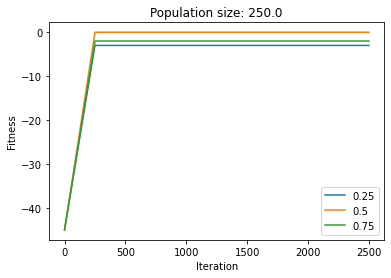

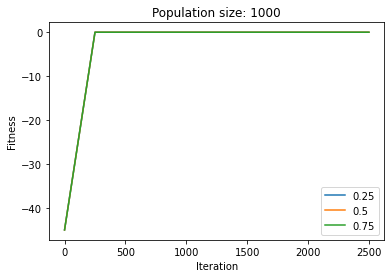

In [72]:
PROBLEM_SIZE = 500
m_stats_500['m_fitness'] = m_stats_500['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='m_fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

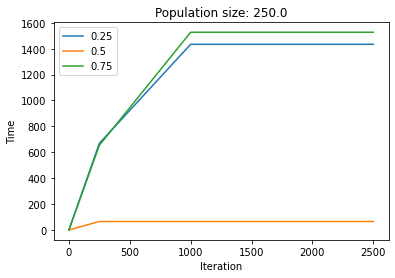

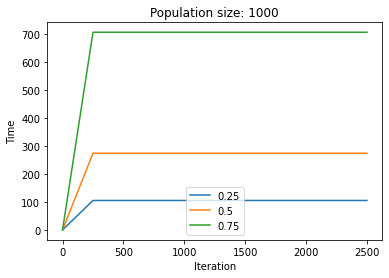

In [73]:
PROBLEM_SIZE = 500
m_stats_500['m_fitness'] = m_stats_500['Fitness'] * -1
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")